<a href="https://colab.research.google.com/github/Shubh4545/Wikipedia_Article_Classification/blob/main/Wikipedia_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0.Import Libraries**

In [57]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
! pip install Wikipedia-API
import wikipediaapi
import pandas as pd
import pandas as pd
import wikipediaapi
import math
import json
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1.Clean Dataset**

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/COLAB/wiki/existing_data.csv')
dataset.head()

,Title,Article Name,Summary,Full Text,Links,Sections,Categories,Class
0,List of Beast Wars episodes,Double_Dinobot,The episodes listed below are from the animate...,The episodes listed below are from the animate...,"['Airazor', 'Ark (Transformers)', 'Asaph Fipke...",3,"['All articles lacking sources', 'Articles lac...",NaN
1,Emeka Jude Ugali,Emeka_Jude_Ugali,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
2,N?rnberg Falcons BC,NÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,"N?rnberg Falcons BC, formerly called N?rnberge...","N?rnberg Falcons BC, formerly called N?rnberge...","['2012?13 ProA', '2013?14 ProA', '2014?15 ProA...",5,['Articles needing translation from German Wik...,NaN
3,Tareq wa Shireen,Tareq_wa_Shireen,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,Coco (2009 film),Coco_(2009_film),"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub


In [5]:
#Good to work on copy of dataset than original dataset
df=dataset.copy()  
df.shape 

(9744, 8)

In [6]:
df.isnull().sum()

Title              0
Article Name       1
Summary         1018
Full Text       1018
Links              1
Sections           1
Categories         1
Class           3176
dtype: int64

In [7]:
df.dropna(subset=['Class'], inplace=True)


In [11]:
df['Class'].value_counts()

Stub                                   3982
Start                                  1734
C                                       326
List                                    243
FA                                      133
B                                       108
GA                                       40
start}}{{WikiProject Southeast Asia       1
Class                                     1
Name: Class, dtype: int64

**As Summary and Full Text have null values present but i think we should not drop as nothing means something valueble here**

**Class is our dependent variable more than 30% data null so we are going to think about it**

In [12]:
df.duplicated().sum()

42

In [13]:
df.drop_duplicates()

,Title,Article Name,Summary,Full Text,Links,Sections,Categories,Class
1,Emeka Jude Ugali,Emeka_Jude_Ugali,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
3,Tareq wa Shireen,Tareq_wa_Shireen,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,Coco (2009 film),Coco_(2009_film),"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub
5,Nicol?s Lombardo,NicolÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,"Nicol?s Italo Lombardo, also known as Nicola I...","Nicol?s Italo Lombardo, also known as Nicola I...","['A.C. Pisa 1909 S.S.D.', 'A.S. Roma', 'Agust?...",0,"['1903 births', 'A.S. Roma players', 'All stub...",Stub
6,Shuriken Sentai Ninninger,Shuriken_Sentai_Ninninger,"Shuriken Sentai Ninninger (????????????, Shuri...","Shuriken Sentai Ninninger (????????????, Shuri...","['Action fiction', 'Amazon Riders', 'Atsushi M...",11,"['2015 Japanese television series debuts', '20...",Start
...,...,...,...,...,...,...,...,...
9738,Perij? tapaculo,PerijÃÂÃÂ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9739,Albert Ket?lbey,Albert_KetÃÂ¨lbey,Albert William Ket?lbey (; born Ketelbey; 9 Au...,Albert William Ket?lbey (; born Ketelbey; 9 Au...,"['Adelphi Theatre', 'Alfred R. Gaul', 'Alice i...",5,"['1875 births', '1959 deaths', '19th-century B...",FA
9740,Perij? tapaculo,PerijÃÂ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9741,Perij? tapaculo,PerijÃ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA


In [14]:
df.isnull().sum()

Title             0
Article Name      0
Summary         399
Full Text       399
Links             0
Sections          0
Categories        0
Class             0
dtype: int64

In [15]:
df.rename(
    columns=({ 'Full Text': 'Full_Text'}), 
    inplace=True,)


In [16]:
df.dtypes

Title           object
Article Name    object
Summary         object
Full_Text       object
Links           object
Sections        object
Categories      object
Class           object
dtype: object

**As Sections coulmn is object type we need convert it in int**

In [17]:
df['Sections'] = pd.to_numeric(df['Sections'], errors='coerce').fillna(0).astype(int)



#**2.Encoding**

**1. Tried to check Title and Article name present in Full Text or not but getting out 1 or o by adjusting threshhold so i decided to remove columns as they are not helful**

In [18]:
df.drop(['Title','Article Name'],inplace=True,axis=1)

In [19]:
df

,Summary,Full_Text,Links,Sections,Categories,Class
1,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
3,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub
5,"Nicol?s Italo Lombardo, also known as Nicola I...","Nicol?s Italo Lombardo, also known as Nicola I...","['A.C. Pisa 1909 S.S.D.', 'A.S. Roma', 'Agust?...",0,"['1903 births', 'A.S. Roma players', 'All stub...",Stub
6,"Shuriken Sentai Ninninger (????????????, Shuri...","Shuriken Sentai Ninninger (????????????, Shuri...","['Action fiction', 'Amazon Riders', 'Atsushi M...",11,"['2015 Japanese television series debuts', '20...",Start
...,...,...,...,...,...,...
9738,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9739,Albert William Ket?lbey (; born Ketelbey; 9 Au...,Albert William Ket?lbey (; born Ketelbey; 9 Au...,"['Adelphi Theatre', 'Alfred R. Gaul', 'Alice i...",5,"['1875 births', '1959 deaths', '19th-century B...",FA
9740,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9741,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA


**2.As Summary and Full Text are two coluns are text detaset we are coverting it into length of text**

In [20]:
df['Summary_Length'] = df['Summary'].str.len()
df['Full_Text_Length'] = df['Full_Text'].str.len()
df.drop(['Full_Text','Summary'],inplace=True,axis=1)


**3.As Links column contains number of links in string format seperated by columns we are going to count it and put count in new column**

In [21]:
df['Links_Count'] = df['Links'].str.count(',') + 1
df.drop('Links',inplace=True,axis=1)

**3.As Categories column contains number of Categories in string format seperated by columns we are going to count it and put count in new column Categories_count**

In [22]:
df['Categories_count'] = df['Categories'].str.count(',') + 1
df.drop('Categories',inplace=True,axis=1)
df

,Sections,Class,Summary_Length,Full_Text_Length,Links_Count,Categories_count
1,2,Start,75.0,1752.0,28,24
3,4,Stub,391.0,956.0,16,12
4,4,Stub,514.0,948.0,32,12
5,0,Stub,293.0,293.0,81,20
6,11,Start,1128.0,11978.0,163,12
...,...,...,...,...,...,...
9738,7,FA,1110.0,9698.0,91,12
9739,5,FA,2486.0,32935.0,195,64
9740,7,FA,1110.0,9698.0,91,12
9741,7,FA,1110.0,9698.0,91,12


#**3.EDA**

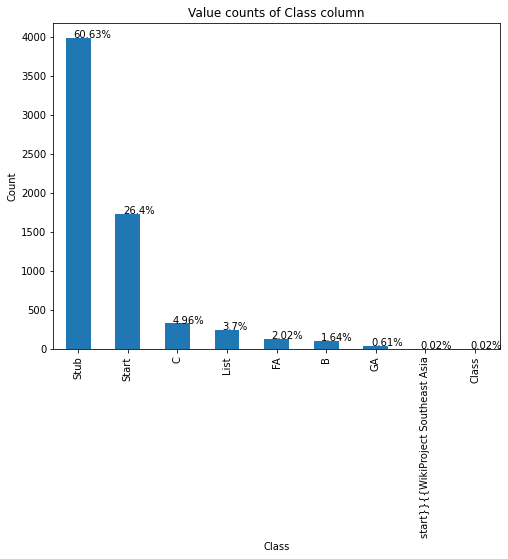

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
# Get value counts of 'Class' column
class_counts = df['Class'].value_counts()

# Calculate percentages
total = sum(class_counts)
percentages = [(count/total)*100 for count in class_counts]

# Plot bar chart
plt.figure(figsize=(8,6))
ax = class_counts.plot(kind='bar')
plt.title('Value counts of Class column')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage labels
for i, v in enumerate(class_counts):
    ax.text(i-0.1, v+5, str(round(percentages[i], 2))+'%', color='black', fontsize=10)

plt.show()



In [24]:
df.Class.unique()

array(['Start', 'Stub', 'List', 'C', 'B', 'GA', 'FA',
       'start}}{{WikiProject Southeast Asia', 'Class'], dtype=object)

In [25]:
df['Class_Binary'] = (df['Class'] == 'FA').astype(int)
df.drop('Class',inplace=True,axis=1)

In [31]:
df.isnull().sum()

Sections            0
Summary_Length      0
Full_Text_Length    0
Links_Count         0
Categories_count    0
Class_Binary        0
dtype: int64

In [30]:
df = df.dropna(subset=['Summary_Length', 'Full_Text_Length'])


In [54]:
df

,Sections,Summary_Length,Full_Text_Length,Links_Count,Categories_count,Class_Binary
1,2,75.0,1752.0,28,24,0
3,4,391.0,956.0,16,12,0
4,4,514.0,948.0,32,12,0
5,0,293.0,293.0,81,20,0
6,11,1128.0,11978.0,163,12,0
...,...,...,...,...,...,...
9738,7,1110.0,9698.0,91,12,1
9739,5,2486.0,32935.0,195,64,1
9740,7,1110.0,9698.0,91,12,1
9741,7,1110.0,9698.0,91,12,1


#**4.Split dataset**

**split dependent and independent features**

In [75]:
X= df.drop(['Class_Binary'],axis=1)
y= df['Class_Binary']


**Split data into train ad test data**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Scalling**

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SMOTE**

In [83]:
smote_tomek = SMOTETomek(sampling_strategy=0.75)


X_resampled, y_resampled  = smote_tomek.fit_resample(X, y)

# Checking the class distribution of the resampled data
print(y_resampled .value_counts())

0    6018
1    4508
Name: Class_Binary, dtype: int64


#**Models**

**1.Logistic Regression model**

In [69]:

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
test_predicted=lr_model.predict(X_test)
train_predicted=lr_model.predict(X_train)

print()
print()
print ("The accuracy of Logistic Regression on training data : ", accuracy_score(y_train, train_predicted)*100, "%")
print ("The accuracy of Logistic Regression on testing data : ", accuracy_score(y_test, test_predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))




The accuracy of Logistic Regression on training data :  97.96757803048632 %
The accuracy of Logistic Regression on testing data :  98.47740667976424 %
The aurroc_auc_score of Logistic Regression is :  0.9664291441625441


**1.Logistic Regression model with SMOT Sampling stratergy**

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
train_predicted=lr_model.predict(X_train)
test_predicted=lr_model.predict(X_test)
print()
print()

print ("The accuracy of Logistic Regression on training data : ", accuracy_score(y_train, train_predicted)*100, "%")
print ("The accuracy of Logistic Regression on testing data : ", accuracy_score(y_test, test_predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))





The accuracy of Logistic Regression on training data :  94.29948950652297 %
The accuracy of Logistic Regression on testing data :  94.76108232584917 %
The aurroc_auc_score of Logistic Regression is :  0.9678974395277666


**2.Random Forest**

In [70]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  

rf_model.fit(X_train, y_train)  

predicted_test = rf_model.predict(X_test)
predicted_train = rf_model.predict(X_test)

print("The accuracy of Random Forest on testing datset : ", accuracy_score(y_test, predicted_train.round())*100, "%")
print("The accuracy of Random Forest on training dataset : ", accuracy_score(y_test, predicted_test.round())*100, "%")
print()
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

The accuracy of Random Forest on testing datset :  99.50884086444007 %
The accuracy of Random Forest on training dataset :  99.50884086444007 %

The aurroc_auc_score of  random forest is :  0.9660811812584155


**2.Random Forest with SMOT**

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  

rf_model.fit(X_train, y_train)  

predicted_test = rf_model.predict(X_test)
predicted_train = rf_model.predict(X_test)

print("The accuracy of Random Forest on testing datset : ", accuracy_score(y_test, predicted_train.round())*100, "%")
print("The accuracy of Random Forest on training dataset : ", accuracy_score(y_test, predicted_test.round())*100, "%")
print()
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

The accuracy of Random Forest on testing datset :  99.3091537132988 %
The accuracy of Random Forest on training dataset :  99.3091537132988 %

The aurroc_auc_score of  random forest is :  0.999093665254468


**3.SVC model**

In [71]:
svm_model = SVC(kernel='rbf', probability=True)

svm_model.fit(X_train, y_train)

predicted_test = svm_model.predict(X_test)
predicted_train = svm_model.predict(X_train)

print("The accuracy of SVM on testing dataset : ", accuracy_score(y_test, predicted_test)*100, "%")
print("The accuracy of SVM on training dataset : ", accuracy_score(y_train, predicted_train)*100, "%")
print()
print("The aucroc score of SVM is : ", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))


The accuracy of SVM on testing dataset :  99.01768172888016 %
The accuracy of SVM on training dataset :  98.45148802322768 %

The aucroc score of SVM is :  0.9591521808196795


**SVC Model with SMOT**

In [86]:

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Machine classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict the labels of the test dataset
y_pred_test = svm_model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_test)
print("The accuracy of SVM on the testing dataset:", accuracy)

# Calculate the AUC score of the classifier
y_prob_test = svm_model.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_prob_test)
print("The AUC score of SVM on the testing dataset:", auc_score)


The accuracy of SVM on the testing dataset: 0.9447322970639033
The AUC score of SVM on the testing dataset: 0.9680584220041604


**Oberservation**

**When we are using smote stratergy accuracy getting reduced and without smote it is increasing**

#**Post Evaluation**

**1. What’s the accuracy you are getting?**

Highest accuracy getting from Random Forest Classifier 99.5

From logistic regression 97.7

and from SVM 99.01

**2.What if i choose SVM instead of logistic regression?**

As per accuracy and auroc score SVM performing better than logistic regression

**3. What features do you think are important? Can you get the same accuracy using only a single feature?**

**Feature Importance**

<AxesSubplot:>

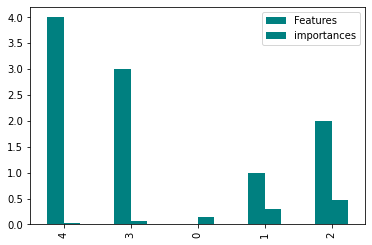

In [49]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')
df1.plot.bar(color='teal')

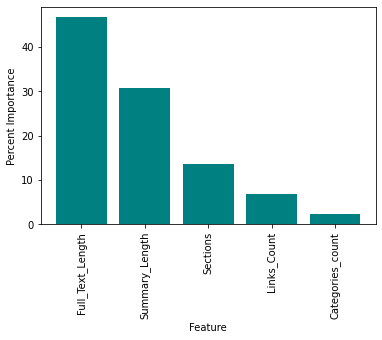

In [56]:
df2=df.drop('Class_Binary',axis=1)
feature_names = list(df2.columns)
if 'y' in feature_names:
    feature_names.remove('y')
total_importance = importances.sum()
percent_importances = importances / total_importance * 100

# DataFrame with the feature names and their percent importances
df2 = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})

# Sort the DataFrame
df2 = df2.sort_values(by='percent_importances', ascending=False)

#bar plot of the percent importances
plt.bar(x=df2['feature_names'], height=df2['percent_importances'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()


**when we use most important feature as single independent feature**

In [89]:
X_new = X['Full_Text_Length'].values.reshape(-1, 1)
y_new= y
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  

rf_model.fit(X_train, y_train)  

predicted_test = rf_model.predict(X_test)
predicted_train = rf_model.predict(X_test)

print("The accuracy of Random Forest on testing datset : ", accuracy_score(y_test, predicted_train.round())*100, "%")
print("The accuracy of Random Forest on training dataset : ", accuracy_score(y_test, predicted_test.round())*100, "%")
print()
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

The accuracy of Random Forest on testing datset :  99.16502946954814 %
The accuracy of Random Forest on training dataset :  99.16502946954814 %

The aurroc_auc_score of  random forest is :  0.9362547088458222


**we get slightly less accuracy it means other features are also important**